In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df_deluxe = pd.read_csv('Combined_Data.csv')

In [3]:
df_deluxe = df_deluxe.drop(["Unnamed: 0"], axis=1)

In [4]:
list(df_deluxe.columns.values)

['Regional.indicator',
 'Ladder.score',
 'Logged.GDP.per.capita',
 'Social.support',
 'Healthy.life.expectancy',
 'Freedom.to.make.life.choices',
 'Generosity',
 'Perceptions.of.corruption',
 'dollar_price']

In [5]:
df_deluxe.head(10)

,Regional.indicator,Ladder.score,Logged.GDP.per.capita,Social.support,Healthy.life.expectancy,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption,dollar_price
0,Latin America and Caribbean,5.929,9.962,0.898,69.000,0.828,-0.182,0.834,4.125534
1,North America and ANZ,7.183,10.796,0.940,73.900,0.914,0.159,0.442,4.527955
2,Western Europe,7.268,10.906,0.934,73.300,0.908,0.042,0.481,3.882630
3,Western Europe,6.834,10.823,0.906,72.199,0.783,-0.153,0.646,4.624897
4,Latin America and Caribbean,6.330,9.577,0.882,66.601,0.804,-0.071,0.756,5.101568
5,North America and ANZ,7.103,10.776,0.926,73.800,0.915,0.089,0.415,4.655697
6,Latin America and Caribbean,6.172,10.071,0.882,70.000,0.742,-0.044,0.830,3.844096
7,East Asia,5.339,9.673,0.811,69.593,0.904,-0.146,0.755,2.917127
8,Latin America and Caribbean,6.012,9.557,0.847,68.001,0.837,-0.135,0.841,3.243605
9,Latin America and Caribbean,7.069,9.880,0.891,71.400,0.934,-0.126,0.809,4.000035


In [6]:
df_deluxe.value_counts(['Regional.indicator'])

Regional.indicator                
Western Europe                        15
Latin America and Caribbean            9
Southeast Asia                         6
North America and ANZ                  4
Middle East and North Africa           4
Central and Eastern Europe             4
South Asia                             3
East Asia                              3
Commonwealth of Independent States     2
Sub-Saharan Africa                     1
dtype: int64

In [7]:
df_deluxe = df_deluxe.rename(columns={"Ladder.score" : "Perceptions.of.happiness"})
df_deluxe = df_deluxe.rename(columns={"dollar_price" : "Dollar.price"})

In [8]:
df_deluxe.head(10)

,Regional.indicator,Perceptions.of.happiness,Logged.GDP.per.capita,Social.support,Healthy.life.expectancy,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption,Dollar.price
0,Latin America and Caribbean,5.929,9.962,0.898,69.000,0.828,-0.182,0.834,4.125534
1,North America and ANZ,7.183,10.796,0.940,73.900,0.914,0.159,0.442,4.527955
2,Western Europe,7.268,10.906,0.934,73.300,0.908,0.042,0.481,3.882630
3,Western Europe,6.834,10.823,0.906,72.199,0.783,-0.153,0.646,4.624897
4,Latin America and Caribbean,6.330,9.577,0.882,66.601,0.804,-0.071,0.756,5.101568
5,North America and ANZ,7.103,10.776,0.926,73.800,0.915,0.089,0.415,4.655697
6,Latin America and Caribbean,6.172,10.071,0.882,70.000,0.742,-0.044,0.830,3.844096
7,East Asia,5.339,9.673,0.811,69.593,0.904,-0.146,0.755,2.917127
8,Latin America and Caribbean,6.012,9.557,0.847,68.001,0.837,-0.135,0.841,3.243605
9,Latin America and Caribbean,7.069,9.880,0.891,71.400,0.934,-0.126,0.809,4.000035


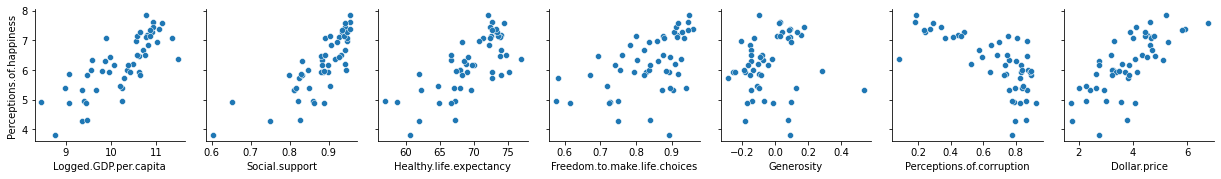

In [9]:
g = sns.PairGrid(df_deluxe,y_vars = ['Perceptions.of.happiness'], x_vars = ['Logged.GDP.per.capita','Social.support', 
                                                                                  'Healthy.life.expectancy','Freedom.to.make.life.choices','Generosity','Perceptions.of.corruption','Dollar.price'])
g.map(sns.scatterplot)
plt.show()

In [10]:
from sklearn import linear_model
X_happymeal = df_deluxe["Dollar.price"].to_numpy()
Y = df_deluxe["Perceptions.of.happiness"].to_numpy()
reg = linear_model.LinearRegression()
reg.fit(X_happymeal.reshape(-1,1), Y)
Y_pred_happymeal = reg.predict(X_happymeal.reshape(-1,1))

X_life = df_deluxe["Healthy.life.expectancy"].to_numpy()
reg2 = linear_model.LinearRegression()
reg2.fit(X_life.reshape(-1,1), Y)
Y_pred_life = reg2.predict(X_life.reshape(-1,1))

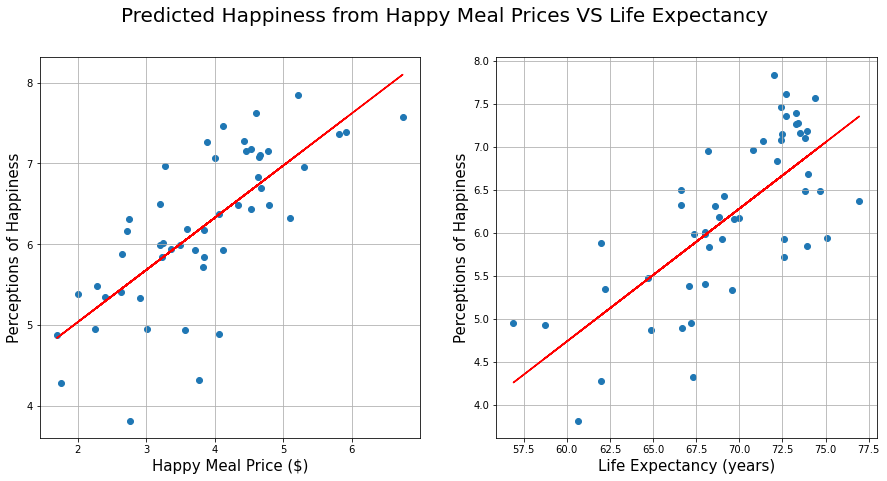

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
#plt.figure()
axs[0].scatter(X_happymeal, Y)
axs[0].plot(X_happymeal, Y_pred_happymeal, color='red')
axs[0].set(xlabel='Happy Meal Price ($)', ylabel='Perceptions of Happiness')
axs[0].grid(True)
fig.suptitle('Predicted Happiness from Happy Meal Prices VS Life Expectancy', fontsize=20)
axs[1].scatter(X_life, Y)
axs[1].plot(X_life, Y_pred_life, color='red')
axs[1].set(xlabel='Life Expectancy (years)', ylabel='Perceptions of Happiness')
axs[1].grid(True)

axs[0].xaxis.get_label().set_fontsize(15)
axs[0].yaxis.get_label().set_fontsize(15)
axs[1].xaxis.get_label().set_fontsize(15)
axs[1].yaxis.get_label().set_fontsize(15)
plt.show()

# Getting Summary Stats Using Statsmodels

In [12]:
import statsmodels.api as sm
X_happymeal_adjust = sm.add_constant(X_happymeal)
happymeal_model = sm.OLS(Y, X_happymeal_adjust)
results_happymeal = happymeal_model.fit()
print(results_happymeal.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     57.17
Date:                Wed, 21 Jul 2021   Prob (F-statistic):           9.01e-10
Time:                        18:26:05   Log-Likelihood:                -49.919
No. Observations:                  51   AIC:                             103.8
Df Residuals:                      49   BIC:                             107.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7424      0.339     11.054      0.0

In [13]:
X_life_adjust = sm.add_constant(X_life)
life_model = sm.OLS(Y, X_life_adjust)
results_life = life_model.fit()
print(results_life.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     53.03
Date:                Wed, 21 Jul 2021   Prob (F-statistic):           2.42e-09
Time:                        18:26:05   Log-Likelihood:                -50.932
No. Observations:                  51   AIC:                             105.9
Df Residuals:                      49   BIC:                             109.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5287      1.477     -3.066      0.0

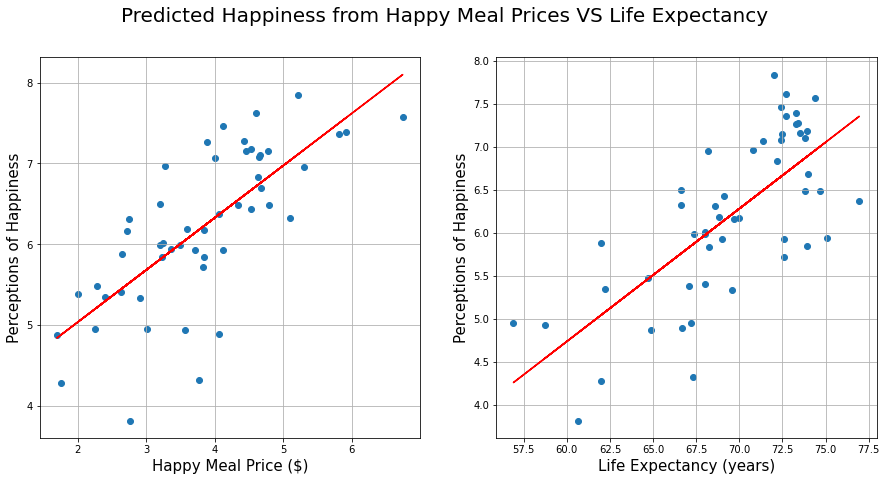

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
#plt.figure()
axs[0].scatter(X_happymeal, Y)
axs[0].plot(X_happymeal, results_happymeal.predict(), color='red')
axs[0].set(xlabel='Happy Meal Price ($)', ylabel='Perceptions of Happiness')
axs[0].grid(True)
fig.suptitle('Predicted Happiness from Happy Meal Prices VS Life Expectancy', fontsize=20)
axs[1].scatter(X_life, Y)
axs[1].plot(X_life, results_life.predict(), color='red')
axs[1].set(xlabel='Life Expectancy (years)', ylabel='Perceptions of Happiness')
axs[1].grid(True)

axs[0].xaxis.get_label().set_fontsize(15)
axs[0].yaxis.get_label().set_fontsize(15)
axs[1].xaxis.get_label().set_fontsize(15)
axs[1].yaxis.get_label().set_fontsize(15)
plt.show()

In [15]:
happymeal_ci = results_happymeal.conf_int()
life_ci = results_life.conf_int()
print(life_ci)

[[-7.49693523 -1.56056379]
 [ 0.1118302   0.19706996]]


In [16]:
def plot_CI(x, Y_pred, ci, name):
    fig, ax = plt.subplots(figsize=(7,7))
    ax.scatter(x, Y)
    ax.plot(x, Y_pred.predict(), color='r')
    #ax.fill_between(x, )
    ax.set(xlabel=list(name.values())[0], ylabel='Perceptions of Happiness')
    fig.suptitle(list(name.keys())[0], fontsize=17)
    ax.xaxis.get_label().set_fontsize(15)
    ax.yaxis.get_label().set_fontsize(15)
    ax.grid(True)
    plt.show()
    #predictions = Y_pred.get_pre
#plot_CI(X_happymeal, results_happymeal, happymeal_ci, {"Predicted Happiness from Happy Meal Prices":"Happy Meal Price ($)"})

# Get Predictions Using R-Style Formulas

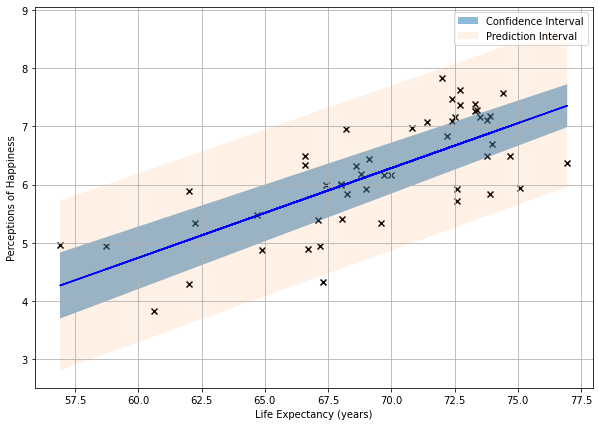

In [17]:
import statsmodels.formula.api as smf
from scipy.interpolate import UnivariateSpline
df = df_deluxe.rename(columns={'Perceptions.of.happiness':'happiness', 'Healthy.life.expectancy':'life'})

model = smf.ols('happiness ~ life', df)
results = model.fit()
predictions = results.get_prediction(df).summary_frame(0.05)

# Get splines for CI
x = df['life'].to_numpy()
y = predictions['mean_ci_lower'].to_numpy()
y2 = predictions['mean_ci_upper'].to_numpy()
xnew = np.linspace(x.min(), x.max(), 51)
ylo = np.linspace(y.min(), y.max(), 51)
yhi = np.linspace(y2.min(), y2.max(), 51)
spl = UnivariateSpline(xnew, ylo)
spl2 = UnivariateSpline(xnew, yhi)

# Get splines fo PI
yPI = predictions['obs_ci_lower'].to_numpy()
yPI2 = predictions['obs_ci_upper'].to_numpy()
y2lo = np.linspace(yPI.min(), yPI.max(), 51)
y2hi = np.linspace(yPI2.min(), yPI2.max(), 51)
splPI = UnivariateSpline(xnew, y2lo)
splPI2 = UnivariateSpline(xnew, y2hi)

#spl = make_interp_spline(x,, k=3)
# Plotting
#lt.rc('axes',labelsize=20)
plt.figure(figsize=(10,7))
plt.scatter(df['life'], df['happiness'], marker = 'x', color = 'black')
plt.plot(df['life'], predictions['mean'], color='b')
plt.fill_between(xnew, spl(xnew), spl2(xnew), alpha=0.5, label='Confidence Interval')
plt.fill_between(xnew, splPI(xnew), splPI2(xnew), alpha=0.1, label='Prediction Interval')
#plt.scatter(xnew, ynew)
#plt.plot(xnew, spl2(xnew))
plt.legend()
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Perceptions of Happiness')
plt.grid(True)
plt.show()

In [18]:
print(predictions)

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0   6.128306  0.094441       5.938519       6.318093      4.768307   
1   6.885111  0.132301       6.619242       7.150981      5.512426   
2   6.792441  0.123661       6.543936       7.040947      5.423013   
3   6.622392  0.109891       6.401558       6.843226      5.257714   
4   5.757780  0.112216       5.532274       5.983286      4.392339   
5   6.869666  0.130815       6.606784       7.132548      5.497557   
6   6.282756  0.094429       6.092993       6.472519      4.922761   
7   6.219895  0.093858       6.031281       6.408509      4.860059   
8   5.974010  0.099094       5.774873       6.173148      4.612675   
9   6.498986  0.102103       6.293802       6.704170      5.136753   
10  6.407397  0.097831       6.210798       6.603996      5.046431   
11  6.699771  0.115777       6.467110       6.932433      5.333130   
12  5.046846  0.184762       4.675552       5.418141      3.649908   
13  6.097416  0.0950

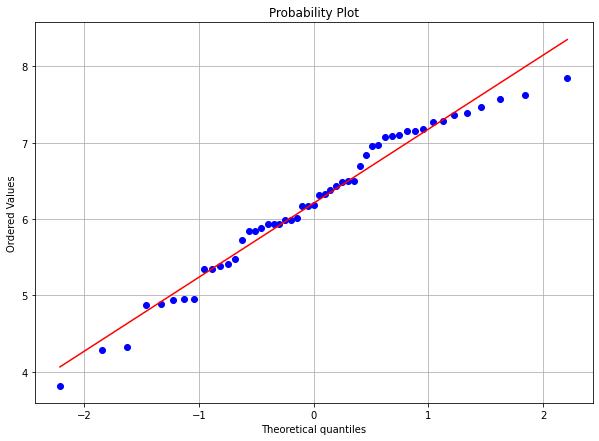

In [19]:
from scipy import stats
plt.figure(figsize=(10,7))
plt.grid(True)
res = stats.probplot(df['happiness'], plot=plt)
plt.show()

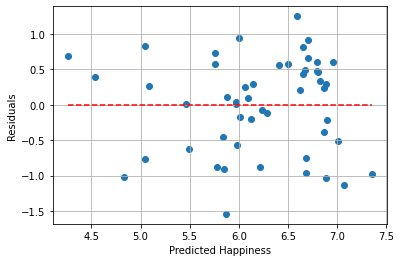

In [20]:
residuals = Y - Y_pred_life
plt.scatter(Y_pred_life, residuals)
plt.plot([Y_pred_life.min(),Y_pred_life.max()],[0,0], '--',color = 'red')
plt.xlabel('Predicted Happiness')
plt.ylabel('Residuals')
plt.grid(True)

# Final DF Modification

In [22]:
data = df_deluxe
data.columns = [c.replace('.','_') for c in data.columns]
data = data.drop([38])

data.to_csv('final_happiness.csv')

# Multiple Regression Model

## Using Every Predictor

In [23]:
import statsmodels.formula.api as smf
multiple_model = smf.ols('Perceptions_of_happiness ~ Healthy_life_expectancy + Social_support + Logged_GDP_per_capita + Freedom_to_make_life_choices + Generosity + Perceptions_of_corruption + Dollar_price', data)
multiple_results = multiple_model.fit()
multiple_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Perceptions_of_happiness   R-squared:                       0.834
Model:                                  OLS   Adj. R-squared:                  0.806
Method:                       Least Squares   F-statistic:                     30.15
Date:                      Mon, 19 Jul 2021   Prob (F-statistic):           2.02e-14
Time:                              09:18:10   Log-Likelihood:                -22.986
No. Observations:                        50   AIC:                             61.97
Df Residuals:                            42   BIC:                             77.27
Df Model:                                 7                                         
Covariance Type:                  nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -4.3946      1.771     -2.481      0.017      -7.969      -0.821
Healthy_life_expectancy          0.0051      0.029      0.176      0.861      -0.053       0.063
Social_support                   4.7109      1.338      3.520      0.001       2.010       7.411
Logged_GDP_per_capita            0.3163      0.186      1.697      0.097      -0.060       0.692
Freedom_to_make_life_choices     2.2116      0.815      2.713      0.010       0.566       3.857
Generosity                      -0.0409      0.458     -0.089      0.929      -0.965       0.883
Perceptions_of_corruption       -0.0559      0.447     -0.125      0.901      -0.957       0.845
Dollar_price                     0.2790      0.081      3.442      0.001       0.115       0.443
==============================================================================
Omnibus:                        9.047   Durbin-Watson:                   1.687
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                9.732
Skew:                          -0.689   Prob(JB):                      0.00771
Kurtosis:                       4.664   Cond. No.                     2.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

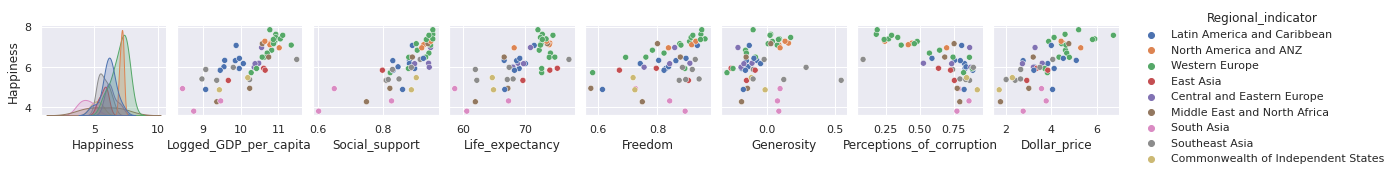

In [24]:
sns.set_theme(color_codes=True)
d = data.rename(columns={'Perceptions_of_happiness':'Happiness', 'Healthy_life_expectancy': 'Life_expectancy', 'Freedom_to_make_life_choices':'Freedom'})
s = sns.pairplot(d, y_vars=['Happiness'], hue='Regional_indicator', height = 2)

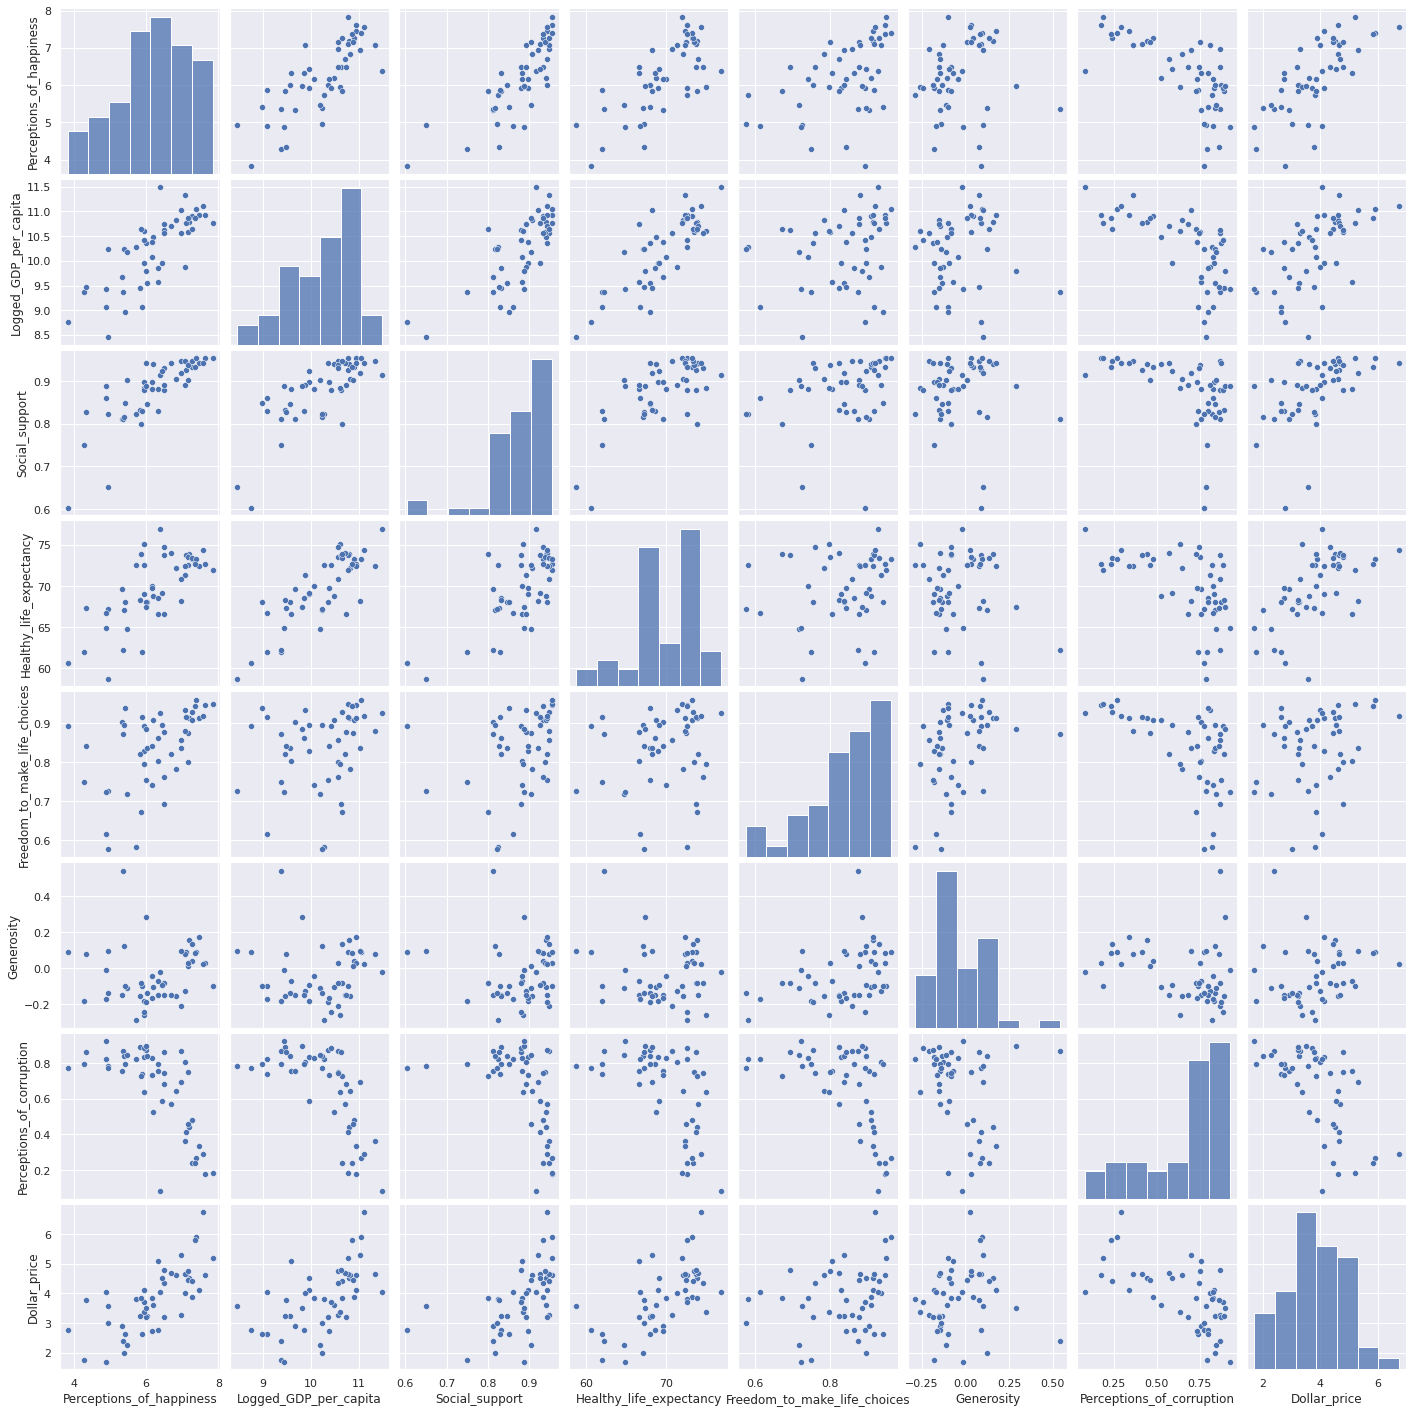

In [25]:
sns.pairplot(data)

<AxesSubplot:xlabel='Perceptions_of_happiness', ylabel='Regional_indicator'>

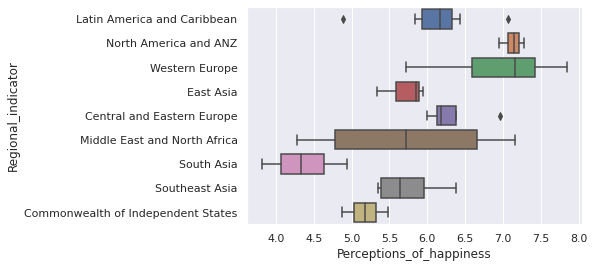

In [26]:
sns.boxplot(x='Perceptions_of_happiness',y='Regional_indicator',data=data)

<AxesSubplot:>

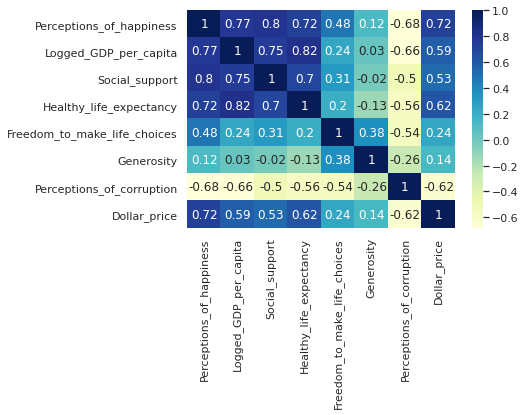

In [27]:
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True, cmap="YlGnBu")

In [28]:
predicted_happiness = multiple_results.predict()
df_results = data[['Perceptions_of_happiness']].copy()
df_results = df_results.rename(columns={'Perceptions_of_happiness':'Actual'})
df_results['Predicted'] = predicted_happiness
df_results

,Actual,Predicted
0,5.929,6.279342
1,7.183,7.076250
2,7.268,6.889054
3,6.834,6.654690
4,6.330,6.289062
5,7.103,7.045685
6,6.172,5.969372
7,5.339,5.614987
8,6.012,5.677470
9,7.069,6.431103


<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

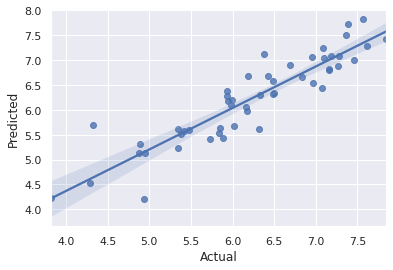

In [31]:
sns.regplot(x='Actual', y='Predicted', ci=95, data=df_results)

# Dropping Logged GDP

In [30]:
data2 = data.drop(['Logged_GDP_per_capita'], axis=1)
multiple_model2 = smf.ols('Perceptions_of_happiness ~ Healthy_life_expectancy + Social_support + Freedom_to_make_life_choices + Generosity + Perceptions_of_corruption + Dollar_price', data2)
multiple_results2 = multiple_model2.fit()
multiple_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Perceptions_of_happiness   R-squared:                       0.834
Model:                                  OLS   Adj. R-squared:                  0.806
Method:                       Least Squares   F-statistic:                     30.15
Date:                      Mon, 19 Jul 2021   Prob (F-statistic):           2.02e-14
Time:                              09:18:22   Log-Likelihood:                -22.986
No. Observations:                        50   AIC:                             61.97
Df Residuals:                            42   BIC:                             77.27
Df Model:                                 7                                         
Covariance Type:                  nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -4.3946      1.771     -2.481      0.017      -7.969      -0.821
Healthy_life_expectancy          0.0051      0.029      0.176      0.861      -0.053       0.063
Social_support                   4.7109      1.338      3.520      0.001       2.010       7.411
Logged_GDP_per_capita            0.3163      0.186      1.697      0.097      -0.060       0.692
Freedom_to_make_life_choices     2.2116      0.815      2.713      0.010       0.566       3.857
Generosity                      -0.0409      0.458     -0.089      0.929      -0.965       0.883
Perceptions_of_corruption       -0.0559      0.447     -0.125      0.901      -0.957       0.845
Dollar_price                     0.2790      0.081      3.442      0.001       0.115       0.443
==============================================================================
Omnibus:                        9.047   Durbin-Watson:                   1.687
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                9.732
Skew:                          -0.689   Prob(JB):                      0.00771
Kurtosis:                       4.664   Cond. No.                     2.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Start of reduced model

In [32]:
data = df_deluxe
multiple_model2 = smf.ols('Perceptions_of_happiness ~ Social_support + Freedom_to_make_life_choices + Dollar_price', data)
p = multiple_model2.fit()
print(p.summary())

                               OLS Regression Results                               
Dep. Variable:     Perceptions_of_happiness   R-squared:                       0.812
Model:                                  OLS   Adj. R-squared:                  0.800
Method:                       Least Squares   F-statistic:                     67.49
Date:                      Mon, 19 Jul 2021   Prob (F-statistic):           4.63e-17
Time:                              09:18:33   Log-Likelihood:                -27.071
No. Observations:                        51   AIC:                             62.14
Df Residuals:                            47   BIC:                             69.87
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

In [33]:
data = df_deluxe
full_interaction_model = smf.ols('Perceptions_of_happiness ~ Social_support + Freedom_to_make_life_choices + Dollar_price + Social_support*Freedom_to_make_life_choices + Social_support*Dollar_price + Social_support*Dollar_price*Freedom_to_make_life_choices', data)
p = full_interaction_model.fit()
print(p.summary())

                               OLS Regression Results                               
Dep. Variable:     Perceptions_of_happiness   R-squared:                       0.845
Model:                                  OLS   Adj. R-squared:                  0.820
Method:                       Least Squares   F-statistic:                     33.61
Date:                      Mon, 19 Jul 2021   Prob (F-statistic):           1.92e-15
Time:                              09:19:21   Log-Likelihood:                -22.017
No. Observations:                        51   AIC:                             60.03
Df Residuals:                            43   BIC:                             75.49
Df Model:                                 7                                         
Covariance Type:                  nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [34]:
data = df_deluxe
interaction_model = smf.ols('Perceptions_of_happiness ~ Social_support + Freedom_to_make_life_choices + Dollar_price + Social_support*Freedom_to_make_life_choices', data)
interaction_p = interaction_model.fit()
print(interaction_p.summary())

                               OLS Regression Results                               
Dep. Variable:     Perceptions_of_happiness   R-squared:                       0.828
Model:                                  OLS   Adj. R-squared:                  0.813
Method:                       Least Squares   F-statistic:                     55.35
Date:                      Mon, 19 Jul 2021   Prob (F-statistic):           5.26e-17
Time:                              09:19:29   Log-Likelihood:                -24.755
No. Observations:                        51   AIC:                             59.51
Df Residuals:                            46   BIC:                             69.17
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

ShapiroResult(statistic=0.9403877258300781, pvalue=0.012729228474199772)


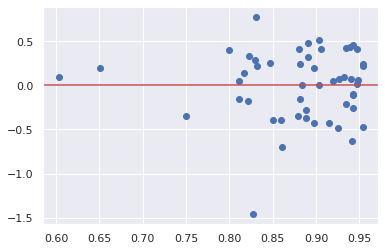

In [35]:
from scipy import stats
import math
shapiro_test = stats.shapiro(interaction_p.resid/math.sqrt((interaction_p.resid).var()))
print(shapiro_test)

yData = data['Perceptions_of_happiness']
plt.plot(data['Social_support'], yData - interaction_p.predict(), 'o')
plt.axhline(color = 'r', linestyle = '-')
